In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('mobile_data_new.csv')
df =df.drop("PhoneId",axis =1)

column_names = list(df.columns.values)
column_names
df.head()

X = df.values[:, 0:10]
y = df.values[:, 10]



def feature_normalize(X):
  mu = np.mean(X, axis = 0)  
  sigma = np.std(X, axis= 0, ddof = 1)
  X_norm = (X - mu)/sigma
  return X_norm, mu, sigma
X, mu, sigma = feature_normalize(X)
X=np.hstack((np.ones((len(X),1)),X))
x,x_test,y,y_test = train_test_split(X,y,test_size = 0.2,random_state =0)
m = len(y)



In [28]:
m=len(x)

def J(w):
    j=0
    for i in range(m):
        h=np.dot(w,x[i])
        j+=1/(2*m)*(h-y[i])**2
    return j
def gradJ(w):
    jw=np.zeros(len(x[0]))
    for i in range(m):
        h=np.dot(w,x[i])
        error=h-y[i]
        
        jw+=x[i]*error*1/m
        
    return jw
def Gradient_Descent_fixedalpha_iterate(gradient_function,a,starting_point,n):
    point=starting_point
    for i in range(n):
        print(np.linalg.norm(gradient_function(point)))
        point=point-gradient_function(point)*a
    return point

def Gradient_Descent_fixedalpha(gradient_function,a,starting_point,e):
    point=starting_point
    while(np.linalg.norm(gradient_function(point))>e):
        print(np.linalg.norm(gradient_function(point)))
        point=point-gradient_function(point)*a
    return point
start=np.ones(len(x[0]))

minima=Gradient_Descent_fixedalpha(gradJ,0.15,start,0.0001)
print(minima)
#print(gradJ(minima))



13.692896377448742
4.600623977988126
2.6311272935939014
2.095145011284798
1.7688487182254018
1.5034423642800214
1.2791561895544559
1.0888392519808423
0.9272639091308579
0.7900717336101466
0.6735745025897295
0.5746456821559013
0.4906338719277859
0.41929007280920294
0.3587062009501793
0.3072630508812659
0.2635862295442108
0.22650882099042624
0.19503973881412057
0.16833688932341764
0.14568440871012672
0.12647335644860386
0.11018534819467832
0.09637869692421061
0.08467670235041878
0.07475778642371016
0.06634721724966297
0.05921019574117749
0.05314610061691767
0.04798370151515285
0.0435771619325075
0.039802668450452265
0.03655554361456575
0.033747727153067036
0.031305541101686846
0.029167684213613765
0.027283425407133355
0.025610982429718116
0.024116080244235345
0.022770685541552472
0.021551911727122897
0.020441085066536725
0.019422959104767212
0.018485061923395458
0.017617159564753695
0.016810818925973296
0.016059054315102756
0.015356043331355531
0.014696899488889466
0.01407749082785916
0.

In [29]:
def Interval_Halving(function,p1 = np.array([]),p2 = np.array([]),e=0.0001):

    l=4
    while (l>e):
        pm=(p1+p2)/2
        pi=(p1+pm)/2
        pj=(pm+p2)/2
        l = np.sqrt(np.dot((p1-p2).T,(p1-p2)))
        if (function(pi)>=function(pm) and function(pj)>=function(pm)):
            p1=pi
            p2=pj
        elif (function(pm)>function(pi) and function(pj)>=function(pi)):
            p2=pm
        else:
            p1=pm
    return  (p1+p2)/2


def Line_search(function,starting_point,vector,alpha):
    po=starting_point
    for i in range(len(alpha)-2):
        p0=starting_point+alpha[i]*vector
        p1=starting_point+alpha[i+1]*vector
        p2=starting_point+alpha[i+2]*vector

        if (function(p0)>=function(p1) and function(p1)<=function(p2)):
            return(Interval_Halving(function,p0,p2,0.00001))      
    return p0

def Gradient_Descent_LineSearch(function,gradient_function,starting_point,e):
    point=starting_point
    a=np.linspace(0,10,200)
    while(np.linalg.norm(gradient_function(point))>e):
        point=Line_search(function,point,-gradient_function(point),a)   
    return point

p=Gradient_Descent_LineSearch(J,gradJ,start,0.01)


In [30]:
# Testing:
t=len(x_test)

def Phone_rating(w,x_test):
    y=[]
    for i in range(len(x_test)):
        y.append(np.dot(w,x_test[i]))
    return y

y_pred=Phone_rating(p,x_test)


In [31]:
# Mean square error:
mse=1/len(y_test)*np.dot(y_test-y_pred,y_test-y_pred)
print("Mean Square error",mse)
# R square error
def r_square(y_test,y_pred):

    rss=np.sum((y_test-y_pred)**2)
    rst=np.sum((y_test-y_test.mean())**2)
    return 1-rss/rst

print("R square error",r_square(y_test,y_pred))

Mean Square error 0.06022952175823873
R square error 0.42690712069115333


Screen Size


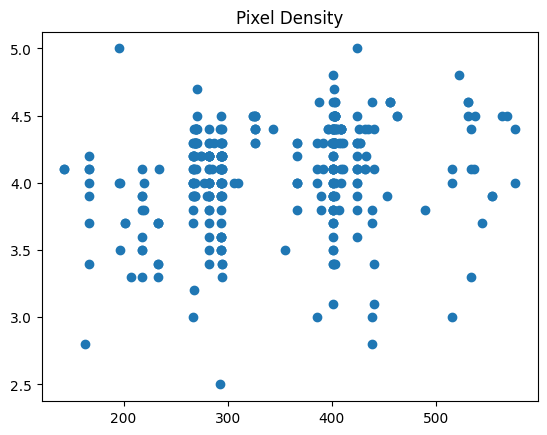

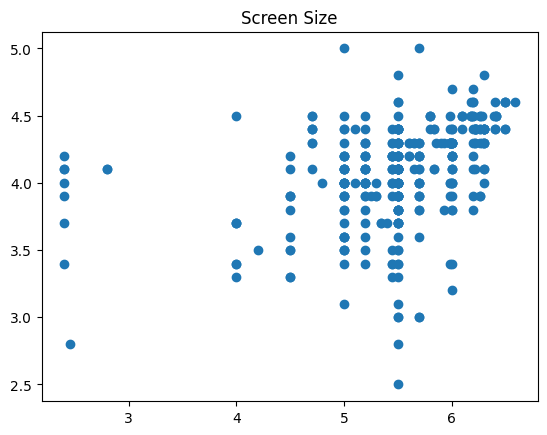

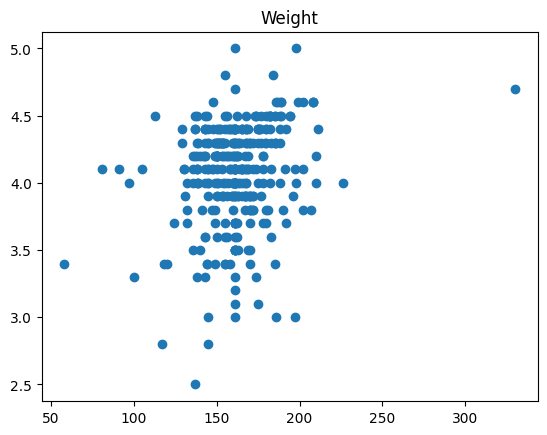

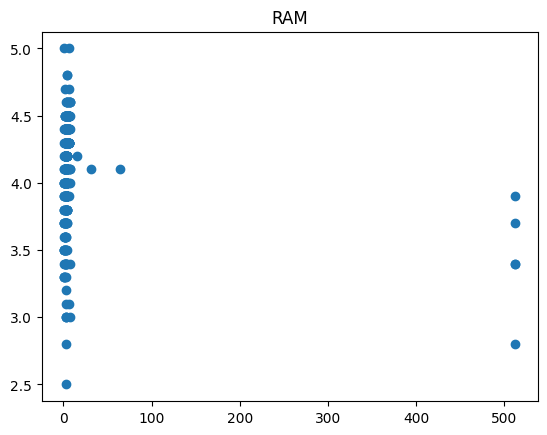

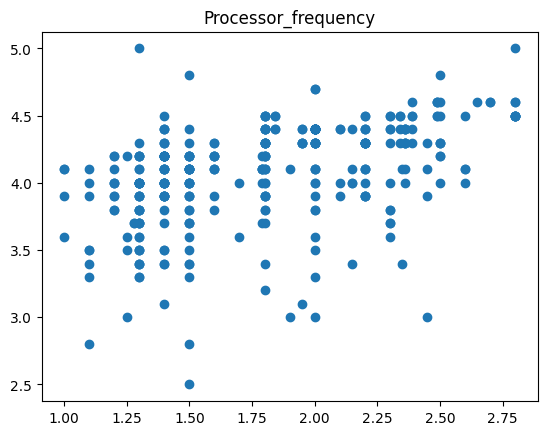

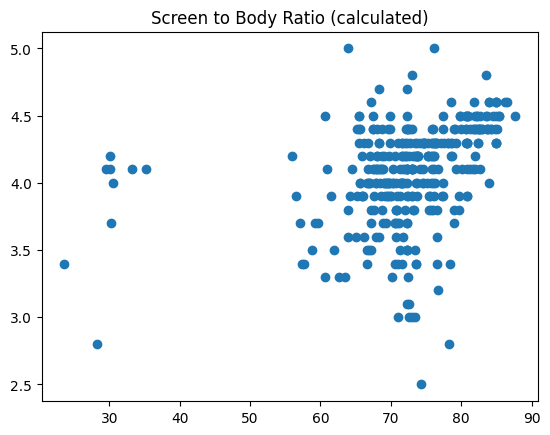

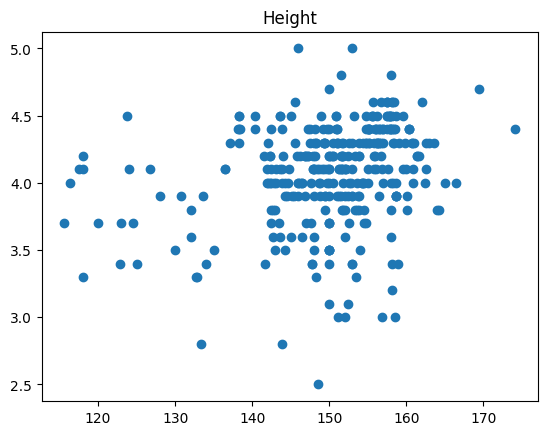

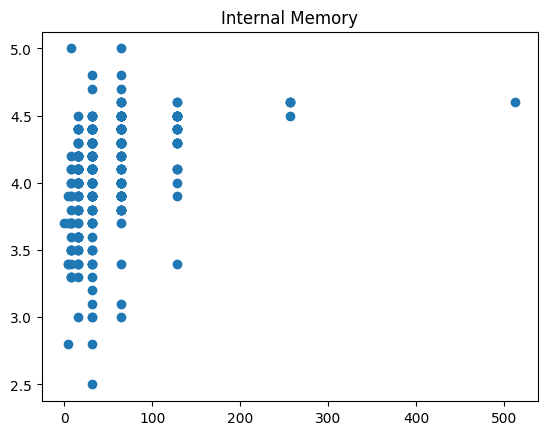

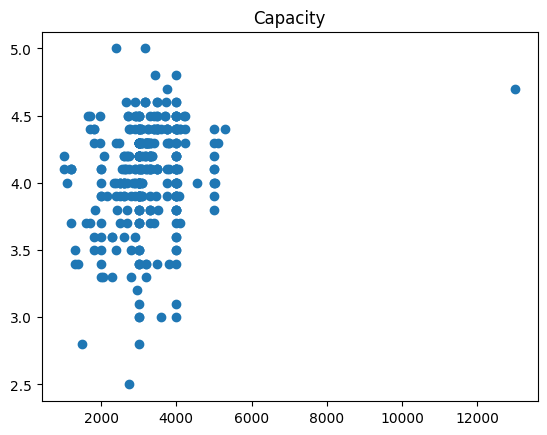

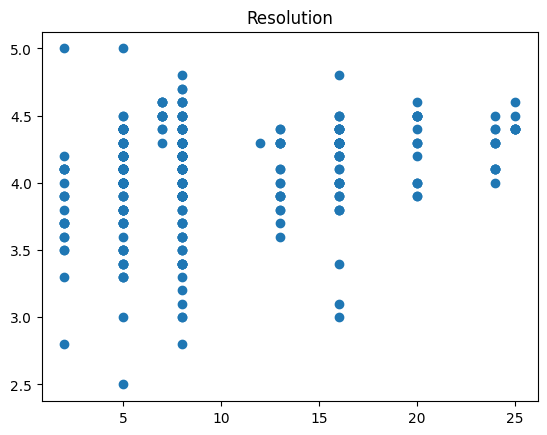

In [32]:
# Scatter Plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('mobile_data_new.csv')
df.fillna(0)
print(df.columns[2])
X=df.to_numpy()
X=np.transpose(X)
Y=X[-1]
X=X[1:len(X)-1] 
# Matrix with rows as columns of each feature

for i in range(len(X)):
    plt.scatter(X[i],Y)
    plt.title(df.columns[1+i])
    plt.show()

Strong Linear Relationship:
* Processor Frequency
* Capacity
* Screen Size

Random:
* Resolution
* Internal Memory
* RAM